# CHN算法XCO2ano重置
* 当前已有数据：国内（加周边方框）数据点异常值集csv_china_anomaly
* 现需要聚合到年尺度（15到23年）。首先同一年份ano合并，再对每一格网计算平均

In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
inPath = "H:\\XCO2\\OCO2_L2_Lite_FP_11.1r\\csv_china_anomaly\\"

china = np.load("china_area.npy") > 0.0
filenames = os.listdir(inPath)
filenames

['oco2_LtCO2_140906.csv',
 'oco2_LtCO2_140907.csv',
 'oco2_LtCO2_140908.csv',
 'oco2_LtCO2_140909.csv',
 'oco2_LtCO2_140910.csv',
 'oco2_LtCO2_140911.csv',
 'oco2_LtCO2_140912.csv',
 'oco2_LtCO2_140913.csv',
 'oco2_LtCO2_140914.csv',
 'oco2_LtCO2_140915.csv',
 'oco2_LtCO2_140916.csv',
 'oco2_LtCO2_140917.csv',
 'oco2_LtCO2_140918.csv',
 'oco2_LtCO2_140919.csv',
 'oco2_LtCO2_140920.csv',
 'oco2_LtCO2_140921.csv',
 'oco2_LtCO2_140922.csv',
 'oco2_LtCO2_140923.csv',
 'oco2_LtCO2_140924.csv',
 'oco2_LtCO2_140925.csv',
 'oco2_LtCO2_140926.csv',
 'oco2_LtCO2_141002.csv',
 'oco2_LtCO2_141003.csv',
 'oco2_LtCO2_141004.csv',
 'oco2_LtCO2_141005.csv',
 'oco2_LtCO2_141006.csv',
 'oco2_LtCO2_141007.csv',
 'oco2_LtCO2_141008.csv',
 'oco2_LtCO2_141009.csv',
 'oco2_LtCO2_141010.csv',
 'oco2_LtCO2_141011.csv',
 'oco2_LtCO2_141012.csv',
 'oco2_LtCO2_141013.csv',
 'oco2_LtCO2_141014.csv',
 'oco2_LtCO2_141015.csv',
 'oco2_LtCO2_141016.csv',
 'oco2_LtCO2_141017.csv',
 'oco2_LtCO2_141018.csv',
 'oco2_LtCO2

In [13]:
outPath = "H:\\XCO2\\OCO2_L2_Lite_FP_11.1r\\CHN_year\\"

for year in range(15, 24):
    year_filenames = [filename for filename in filenames if filename[11:13]==f"{year}"]
    df = pd.concat([pd.read_csv(inPath + filename) for filename in year_filenames], axis=0)  # 一年数据，约七、八十M字节左右
    df["longitude"] += 180.0
    df["latitude"] += 90.0
    df[["longitude", "latitude"]] = df[["longitude", "latitude"]].astype(int)  # 经纬度换整数索引
    df_mean = df.groupby(["longitude", "latitude"]).filter(lambda x: len(x) >= 10)  # 过滤掉样本数量太少的组
    df_mean = df_mean.groupby(["longitude", "latitude"]).mean().reset_index()  # 分组求平均并重置索引、恢复经纬度列
    
    globe = np.full((180, 360), np.NaN)  # 全球dxco2_anomaly矩阵
    globe[df_mean.iloc[:, 1], df_mean.iloc[:, 0]] = df_mean.iloc[:, 2]  # 将平均值结果填充到全球矩阵上
    globe[~china] = np.NaN  # 去掉中国掩膜外的数据
    
    np.save(outPath + f"MappingXCO2_20{year}.npy", globe)
    print(f"20{year} completed.")

2015 completed.
2016 completed.
2017 completed.
2018 completed.
2019 completed.
2020 completed.
2021 completed.
2022 completed.
2023 completed.


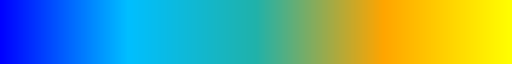

In [35]:
from matplotlib.colors import LinearSegmentedColormap

linearColors = LinearSegmentedColormap.from_list("myColors", ["blue", "deepskyblue", "lightseagreen", "orange", "yellow"], N=600)
linearColors

H:\preprocessing_code\XCO2\OCO-2\OCO2_L2_Lite_FP_11.1r\maplot.py:93: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mapPlot = Map.pcolor(x, y, m, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
H:\preprocessing_code\XCO2\OCO-2\OCO2_L2_Lite_FP_11.1r\maplot.py:93: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mapPlot = Map.pcolor(x, y, m, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
H:\preprocessing_code\XCO2\OCO-2\OCO2_L2_Lite_FP_11.1r\maplot.py:93: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectl

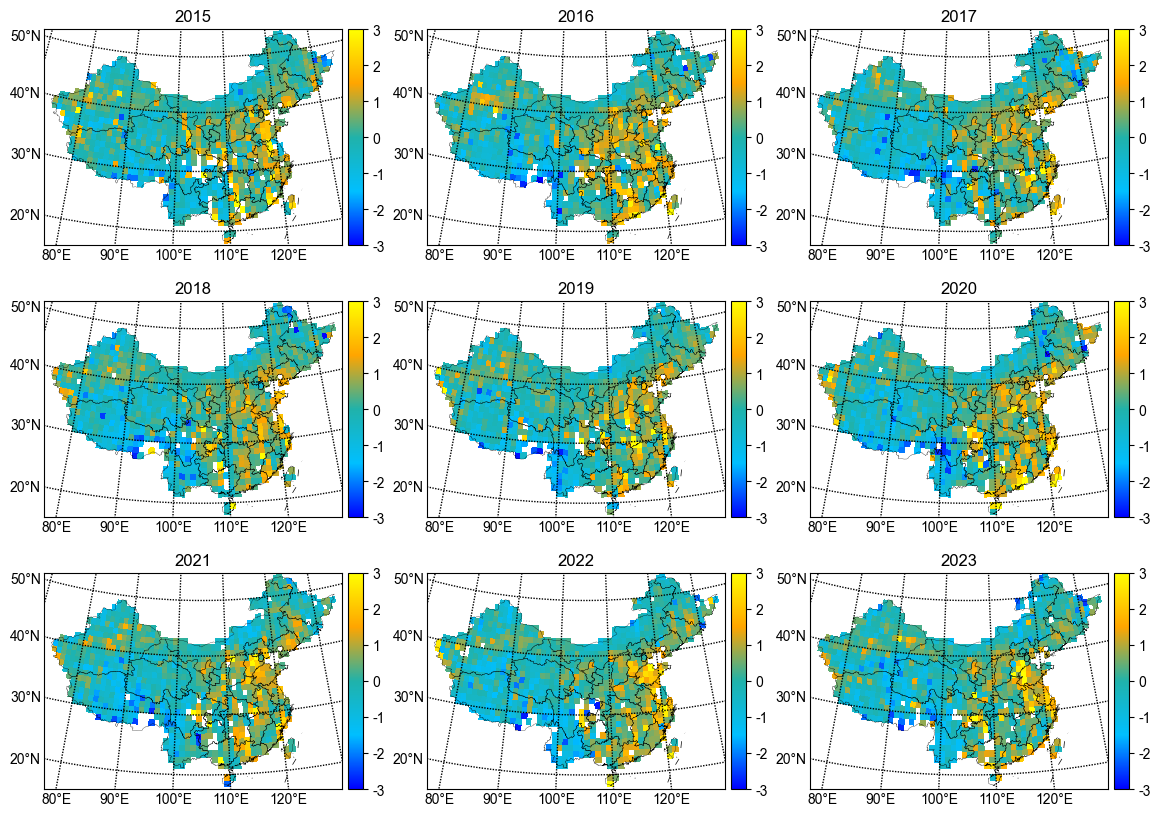

In [36]:
# 绘制测试
import matplotlib.pyplot as plt
from maplot import map_plot_surface_sub

plt.figure(figsize=(14, 10))
sub = 331
for year in range(2015, 2024):
    plt.subplot(sub)
    map_plot_surface_sub(np.load(outPath + f"MappingXCO2_{year}.npy"), linearColors, -3.0, 3.0, f"{year}")
    sub += 1

plt.savefig(outPath + "XCO2_anomaly.jpg", dpi=600, bbox_inches='tight')
plt.show()

In [43]:
mean_9years = np.nanmean(np.array([np.load(outPath + f"MappingXCO2_{year}.npy") for year in range(2015, 2018)]), axis=0)

C:\Users\alzio\AppData\Local\Temp\ipykernel_13036\1446955664.py:1: RuntimeWarning: Mean of empty slice
  mean_9years = np.nanmean(np.array([np.load(outPath + f"MappingXCO2_{year}.npy") for year in range(2015, 2018)]), axis=0)


H:\preprocessing_code\XCO2\OCO-2\OCO2_L2_Lite_FP_11.1r\maplot.py:62: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mapPlot = Map.pcolor(x, y, m, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)


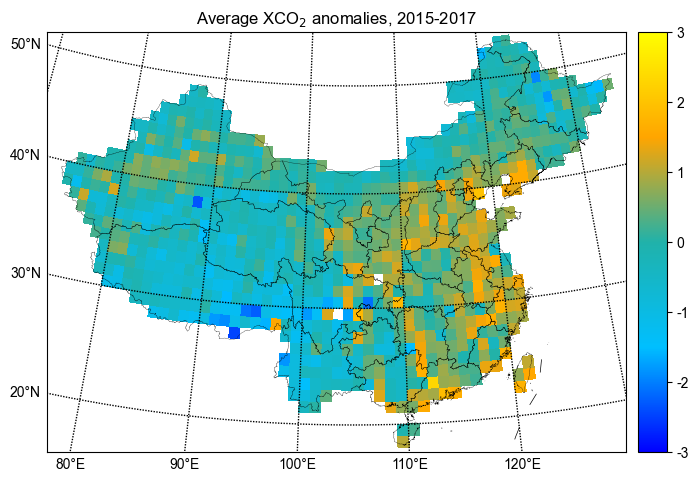

In [44]:
from maplot import map_plot_surface

map_plot_surface(mean_9years, linearColors, -3.0, 3.0, "Average XCO$_{2}$ anomalies, 2015-2017", figsize=(8, 8))